In [1]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Corona_NLP_test.csv')


In [2]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


PART A

In [3]:
!pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
df['tokens'] = df['OriginalTweet'].apply(lambda x: nltk.tokenize.word_tokenize(x))


In [6]:
df['tokens'][0]


['TRENDING',
 ':',
 'New',
 'Yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 '(',
 'pictured',
 ',',
 'Wegmans',
 'in',
 'Brooklyn',
 ')',
 ',',
 'sold-out',
 'online',
 'grocers',
 '(',
 'FoodKick',
 ',',
 'MaxDelivery',
 ')',
 'as',
 '#',
 'coronavirus-fearing',
 'shoppers',
 'stock',
 'up',
 'https',
 ':',
 '//t.co/Gr76pcrLWh',
 'https',
 ':',
 '//t.co/ivMKMsqdT1']

PART B

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [9]:
df['tokens_without_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


In [10]:
df['tokens_without_stopwords'][0]


['TRENDING',
 ':',
 'New',
 'Yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 '(',
 'pictured',
 ',',
 'Wegmans',
 'Brooklyn',
 ')',
 ',',
 'sold-out',
 'online',
 'grocers',
 '(',
 'FoodKick',
 ',',
 'MaxDelivery',
 ')',
 '#',
 'coronavirus-fearing',
 'shoppers',
 'stock',
 'https',
 ':',
 '//t.co/Gr76pcrLWh',
 'https',
 ':',
 '//t.co/ivMKMsqdT1']

PART C

In [13]:
import collections
import itertools 


In [14]:
all_tokens = list(itertools.chain(*df['tokens_without_stopwords']))


In [15]:
word_counts = collections.Counter(all_tokens)


In [16]:
word_counts['stock']


680

In [18]:
word_counts['supermarket']

464

PART D

In [19]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10)


In [21]:
wordcloud.generate_from_frequencies(word_counts)


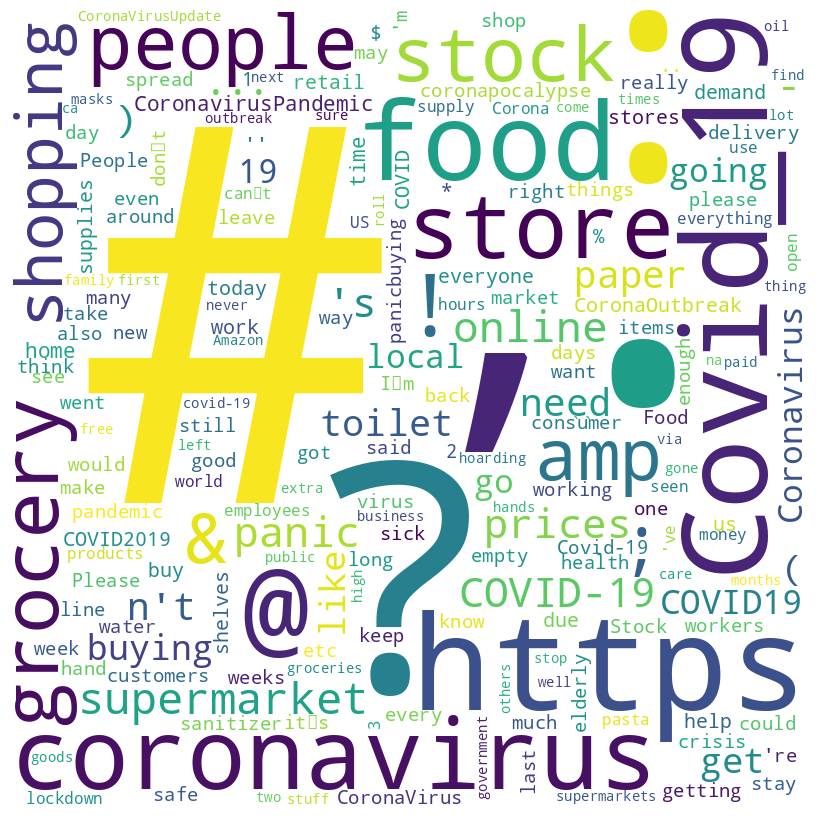

In [22]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
